In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("IPL-First-Innings-Score-Prediction-Deployment-master/ipl.csv")

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [5]:
df.shape

(76014, 15)

In [6]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [7]:
len(df['batsman'].unique())

411

In [8]:
len(df['bowler'].unique())

329

In [9]:
### data cleaning
### removing the unwanted three columns
### we need batsmen  and bowler and also the pitch 

columns_to_remove = ["mid","striker","non-striker","batsman","bowler"]
df.drop(labels=columns_to_remove,axis=1,inplace=True)
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [10]:
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [11]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
### we are  taking only those teams which are availabel currently now

consist_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [13]:
df=df[df.bat_team.isin(consist_teams) & df.bowl_team.isin(consist_teams)]
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [14]:
len(df.bat_team.unique())

8

In [15]:
len(df.bowl_team.unique())

8

In [16]:
df = df[df.overs>=5.0]
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [17]:
df.shape

(40108, 10)

In [18]:
from datetime import datetime

In [19]:
df.date = df.date.apply(lambda x : datetime.strptime(x,"%Y-%m-%d"))

In [20]:
type(df.date)

pandas.core.series.Series

In [21]:
print(df.venue.unique())
print("the number of studiums are present in IPL",len(df.venue.unique()))

['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Sawai Mansingh Stadium'
 'MA Chidambaram Stadium, Chepauk' 'Eden Gardens'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera'
 'Himachal Pradesh Cricket Association Stadium'
 'Subrata Roy Sahara Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Barabati Stadium' 'Maharashtra Cricket Association Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Holkar Cricket Stadium']
the number of studiums are present in IPL 31


In [22]:
dummie1 = pd.get_dummies(df.venue)
dummie1.head()

,Barabati Stadium,Brabourne Stadium,Buffalo Park,De Beers Diamond Oval,Dr DY Patil Sports Academy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Dubai International Cricket Stadium,Eden Gardens,Feroz Shah Kotla,Himachal Pradesh Cricket Association Stadium,...,"Rajiv Gandhi International Stadium, Uppal","Sardar Patel Stadium, Motera",Sawai Mansingh Stadium,Shaheed Veer Narayan Singh International Stadium,Sharjah Cricket Stadium,Sheikh Zayed Stadium,St George's Park,Subrata Roy Sahara Stadium,SuperSport Park,Wankhede Stadium
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dummie2 = pd.get_dummies(df.bat_team)
dummie2.head()
dummie2.shape

(40108, 8)

In [24]:
dummie3 = pd.get_dummies(df.bowl_team)
dummie3.head()
dummie2.shape

(40108, 8)

In [25]:
df = pd.concat([df,dummie1],axis=1)

In [26]:
df = pd.concat([df,dummie2],axis=1)

In [27]:
df = pd.concat([df,dummie3],axis=1)

In [28]:
df.shape

(40108, 57)

In [29]:
df

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,...,Royal Challengers Bangalore,Sunrisers Hyderabad,Chennai Super Kings,Delhi Daredevils,Kings XI Punjab,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107,...,0,0,0,0,0,0,1,0,0,0


In [30]:
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total', 'Barabati Stadium',
       'Brabourne Stadium', 'Buffalo Park', 'De Beers Diamond Oval',
       'Dr DY Patil Sports Academy',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Dubai International Cricket Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Himachal Pradesh Cricket Association Stadium',
       'Holkar Cricket Stadium', 'JSCA International Stadium Complex',
       'Kingsmead', 'M Chinnaswamy Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Maharashtra Cricket Association Stadium', 'New Wanderers Stadium',
       'Newlands', 'OUTsurance Oval',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Punjab Cricket Association Stadium, Mohali',
       'Rajiv Gandhi International Stadium, Uppal',
       'Sardar Patel Stadium, Motera', 'Sawai Mansingh Stadium',
       'Shaheed Veer Narayan Singh International Sta

In [31]:
df.total.astype(int)

32       222
33       222
34       222
35       222
36       222
        ... 
75884    107
75885    107
75886    107
75887    107
75888    107
Name: total, Length: 40108, dtype: int32

In [32]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,...,Royal Challengers Bangalore,Sunrisers Hyderabad,Chennai Super Kings,Delhi Daredevils,Kings XI Punjab,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,...,0,0,0,0,0,0,0,0,1,0


In [33]:
####  preparing the data  

df = df.drop(["venue","bat_team","bowl_team"],axis=1)

In [34]:
X_df = df[df.date.dt.year<=2016]
y_df = df[df.date.dt.year>2016]

In [35]:
len(X_df) , len(y_df)

(37330, 2778)

In [36]:
#### splitting the given data for model

In [39]:
X_train = X_df.drop(['total',"date"], axis=1)
y_train = X_df.total
y_train.astype(int)

32       222
33       222
34       222
35       222
36       222
        ... 
68857    208
68858    208
68859    208
68860    208
68861    208
Name: total, Length: 37330, dtype: int32

In [40]:
X_test = y_df.drop(['total',"date"], axis=1)
y_test = y_df.total
y_test.astype(int)

68894    207
68895    207
68896    207
68897    207
68898    207
        ... 
75884    107
75885    107
75886    107
75887    107
75888    107
Name: total, Length: 2778, dtype: int32

In [41]:
### creating the model 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
y_predi = model.predict(X_test)
model.score(X_test,y_test)

0.726860746784346

In [44]:
len(y_predi)

2778

In [45]:
len(X_test)

2778

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score

In [47]:
print(r2_score(y_test,y_predi))

0.726860746784346


## Ridge Regression

In [48]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [49]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56401e-23): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46712e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.49211e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41533e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56401e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [50]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-338.3547054371043


In [51]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5)
ridge_regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56401e-23): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46712e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.49211e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41533e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56401e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]})

In [52]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
0.602943515433406


In [63]:
prediction=ridge_regressor.predict(X_test)

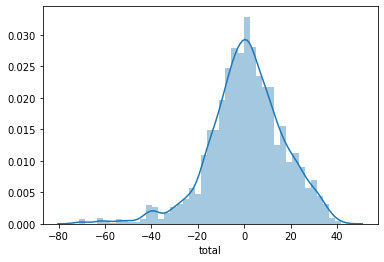

In [64]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [66]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.213583996827493
MSE: 262.3653827960697
RMSE: 16.197696836157593


In [ ]:
### lasso regression

In [56]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [57]:
lasso = Lasso()
#ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4221119.261336823, tolerance: 2529.9556965945626
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4177360.5733819986, tolerance: 2547.0380710286627
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4297910.701127247, tolerance: 2667.8126904366463
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [67]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
prediction=lasso_regressor.predict(X_test)

{'alpha': 1}
-320.82214916809124


In [68]:
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.74105391389545

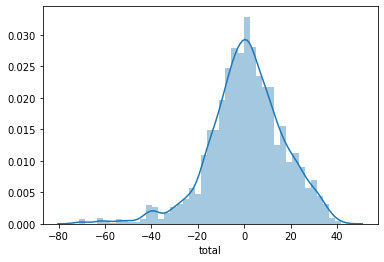

In [69]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [70]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.213583996827493
MSE: 262.3653827960697
RMSE: 16.197696836157593


In [74]:
 import pickle

In [76]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(model, open(filename, 'wb'))